In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline
sns.set()

consumption = pd.read_pickle('./processed/consumption_master_with_SF.pkl')
production = pd.read_pickle('./processed/production_all_dates_and_variables.pkl')
production.set_index('Time')
production.drop('Time', axis=1, inplace=True)
#production.index.to_datetime()

tables = [consumption, production]

for table in tables:
    print("---------------------------")
    for field in list(table):
        print(field)
#print(consumption.head())
#print(production.head())



---------------------------
FOOD_SERVICE
GROCERY
HEALTH_CARE
K12_SCHOOLS
LODGING
OFFICE
RESIDENTIAL
STAND_ALONE_RETAIL
Weekdays
HolidayName
School_Day
Workday
ELECTRIC_CAR
FOOD_SVC_SF
GROCERY_SF
HEALTH_CARE_SF
K12_SF
LODGING_SF
OFFICE_SF
RESIDENTIAL_SF
SA_RTL_SF
FOOD_SVC_TOTAL
GROCERY_TOTAL
HEALTH_CARE_TOTAL
K12_TOTAL
LODGING_TOTAL
OFFICE_TOTAL
RESIDENTIAL_TOTAL
SA_RTL_TOTAL
---------------------------
Wind_KWH
Solar_KWH
Wind_Speed_AT_WINDFARM
Solar_Elevation
Cloud_Cover_Fraction
Dew_Point
Humidity_Fraction
Precipitation
Pressure
Temperature
Visibility
Wind_Speed_AT_SOLARRAY


In [2]:
#print(production.head())
print(consumption.index.dtype)
print(production.index.dtype)

datetime64[ns]
datetime64[ns]


Plotting field 'FOOD_SVC_TOTAL'
Plotting field 'GROCERY_TOTAL'
Plotting field 'HEALTH_CARE_TOTAL'
Plotting field 'K12_TOTAL'
Plotting field 'LODGING_TOTAL'
Plotting field 'OFFICE_TOTAL'
Plotting field 'RESIDENTIAL_TOTAL'
Plotting field 'SA_RTL_TOTAL'


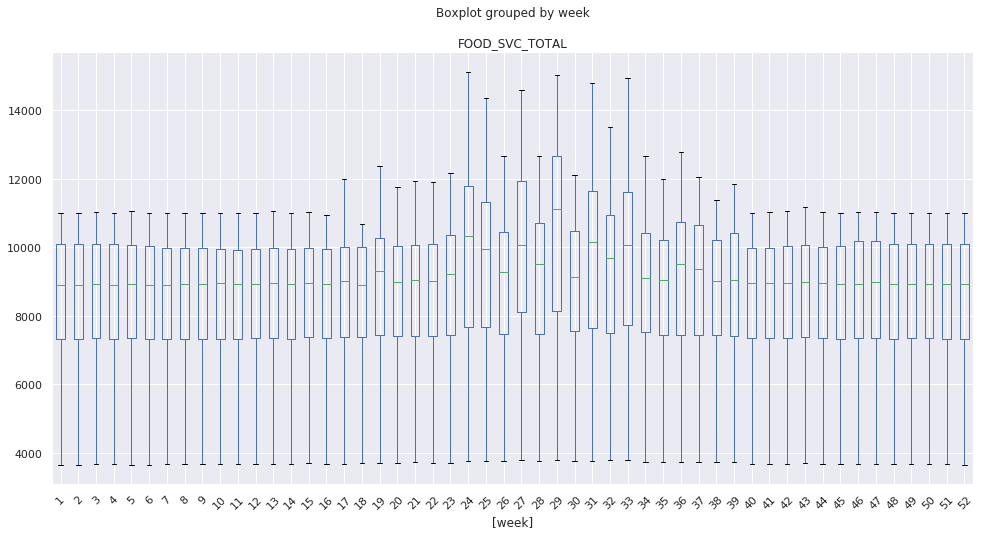

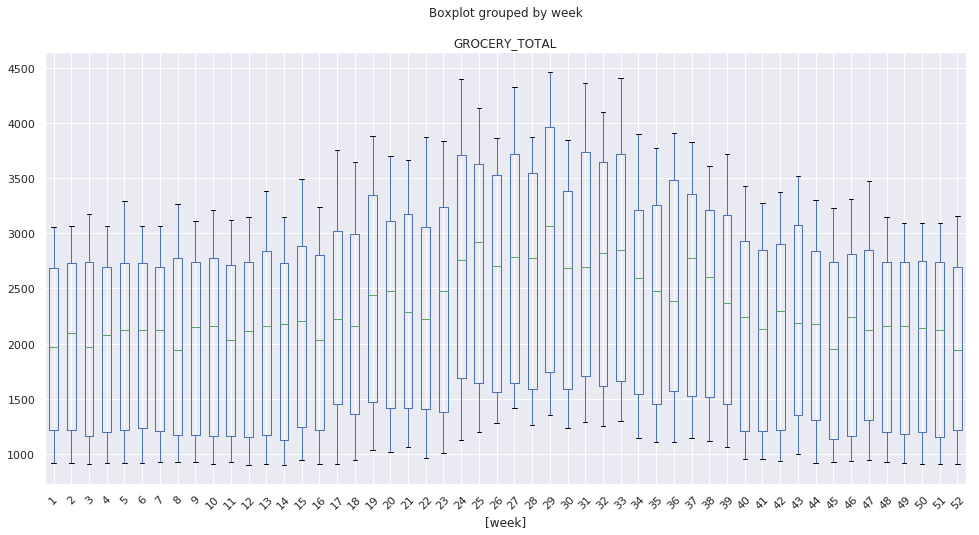

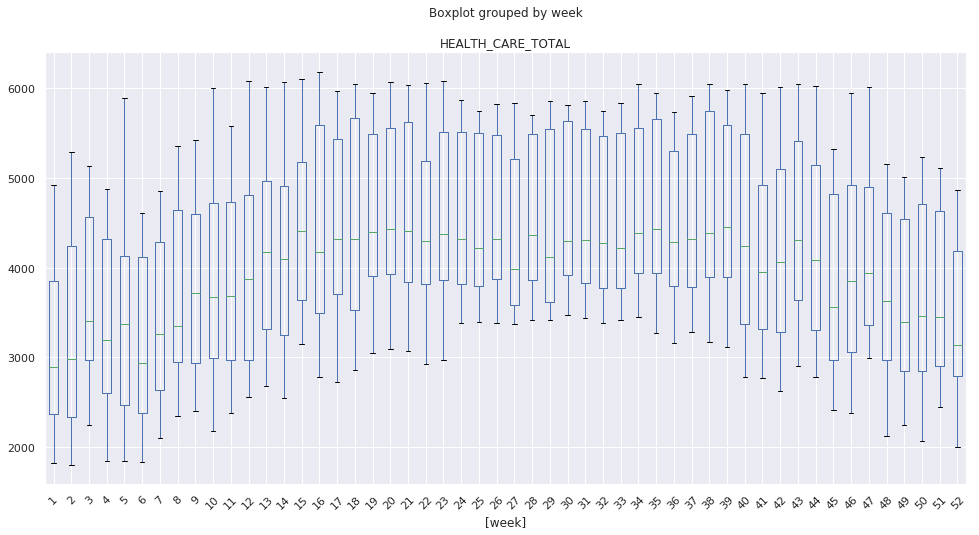

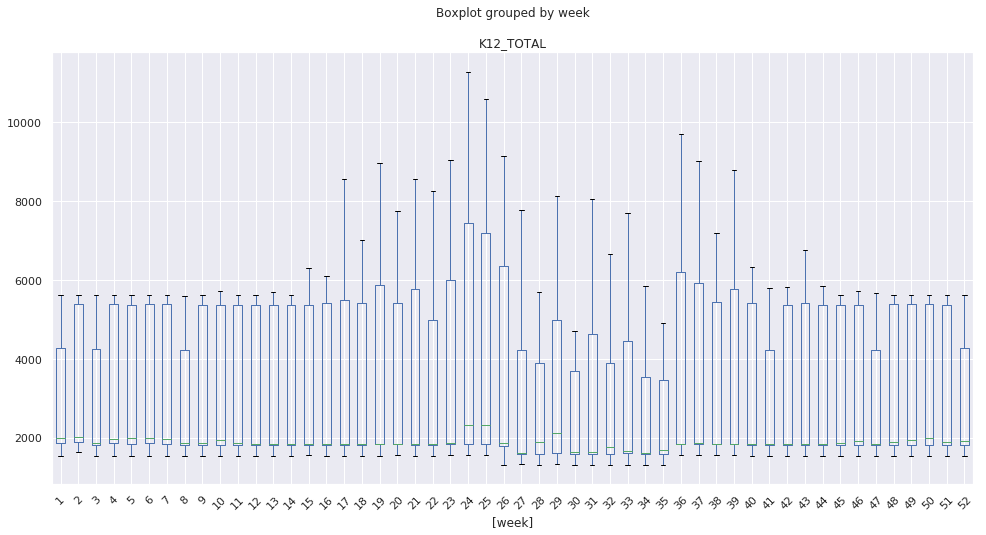

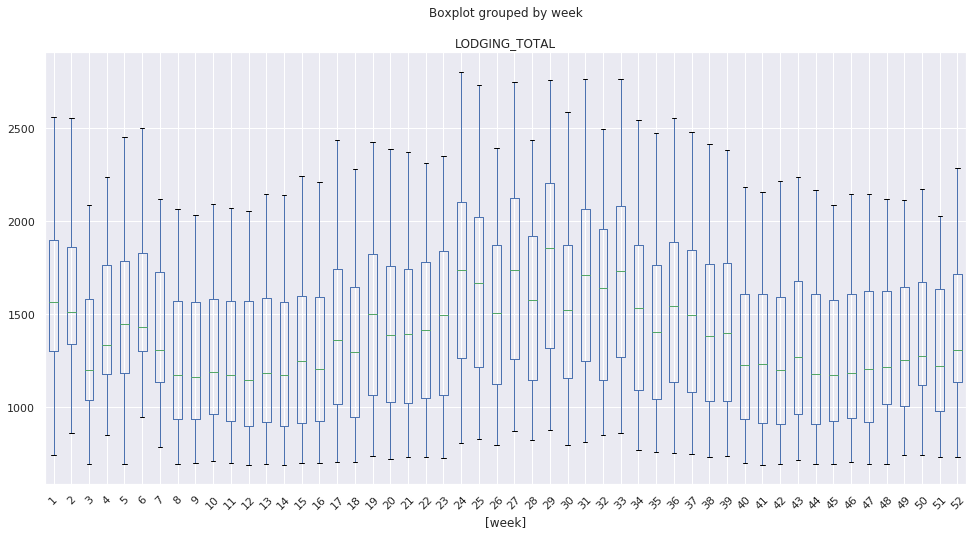

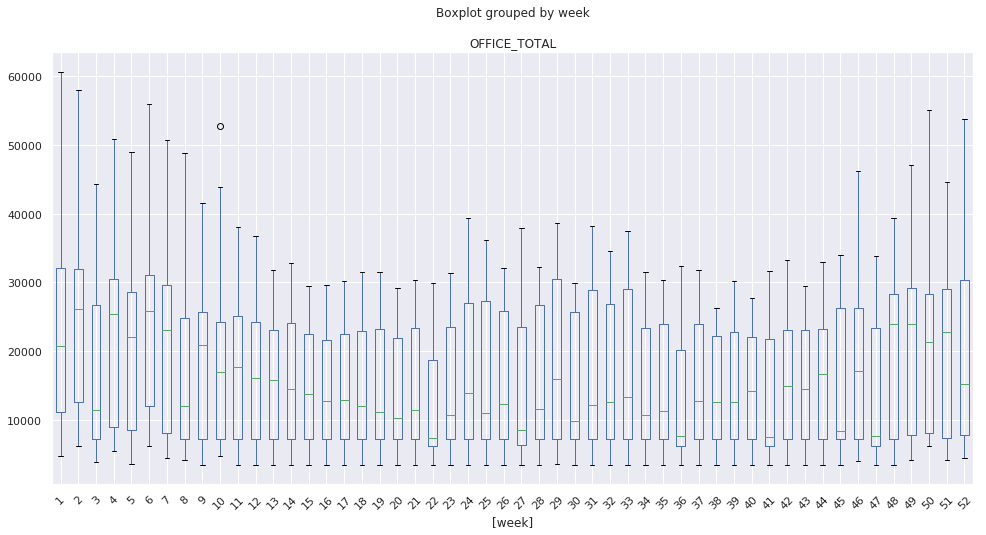

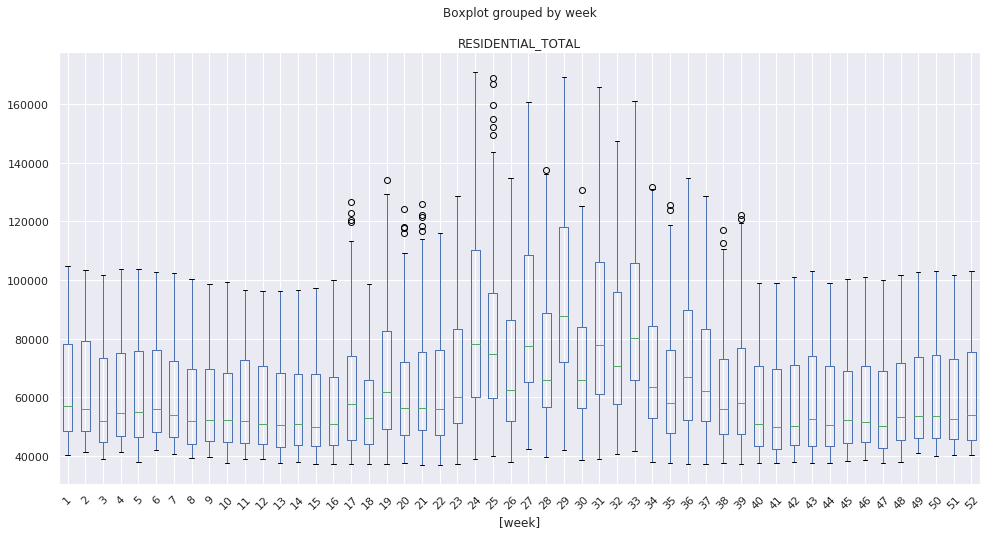

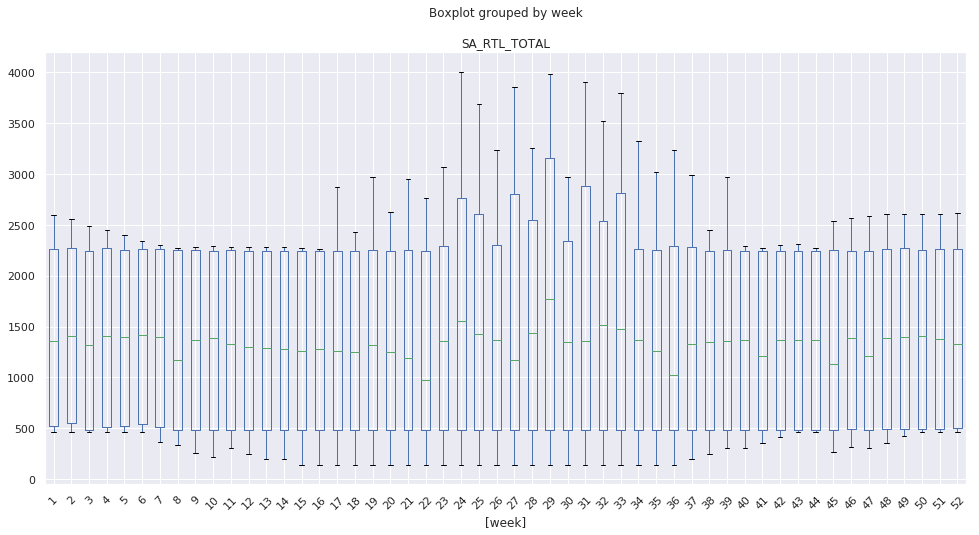

In [3]:
def partition_dataset(ds, column):
    data=ds.loc[ds[column] > 0.0]
    dmin=ds.index.min(axis=0)
    dmax=ds.index.max(axis=0)
    data=ds[column].loc[(ds.index >= dmin) & (ds.index <= dmax)]
    #data[column]=data[column].astype('float64')
    return data

def plot_me(ds, field, interval):
    ds['year']=ds.index.year
    ds['month']=ds.index.month
    ds['week']=ds.index.week
    ds['day']=ds.index.day
    ds['hour']=ds.index.hour
    boxplot = ds.boxplot(column=[field],
                         by=[interval],
                         rot=45,
                         return_type='axes',
                         figsize=(16, 8));
    plt.savefig("./Images/boxplot_of_{}_by_{}.png".format(field, interval))

consumption_fields = ['FOOD_SVC_TOTAL',
                      'GROCERY_TOTAL',
                      'HEALTH_CARE_TOTAL',
                      'K12_TOTAL',
                      'LODGING_TOTAL',
                      'OFFICE_TOTAL',
                      'RESIDENTIAL_TOTAL',
                      'SA_RTL_TOTAL']

production_fields = [ 'Wind_KWH',
                      'Wind_Speed_AT_WINDFARM',
                      'Wind_Speed_AT_SOLARRAY', 
                      'Solar_KWH',
                      'Solar_Elevation',
                      'Cloud_Cover_Fraction',
                      'Dew_Point',
                      'Humidity_Fraction',
                      'Precipitation',
                      'Pressure',
                      'Temperature',
                      'Visibility'
                      ]

for field in consumption_fields:
    print("Plotting field '{}'".format(field))
    ds=partition_dataset(consumption, field)
    ds=pd.DataFrame(ds)
    #ds[field]=ds[field].astype('float64')
    plot_me(ds, field, 'week')



Plotting field 'Wind_KWH'
Plotting field 'Wind_Speed_AT_WINDFARM'
Plotting field 'Wind_Speed_AT_SOLARRAY'
Plotting field 'Solar_KWH'
Plotting field 'Solar_Elevation'
Plotting field 'Cloud_Cover_Fraction'
Plotting field 'Dew_Point'
Plotting field 'Humidity_Fraction'
Plotting field 'Precipitation'
Plotting field 'Pressure'
Plotting field 'Temperature'
Plotting field 'Visibility'


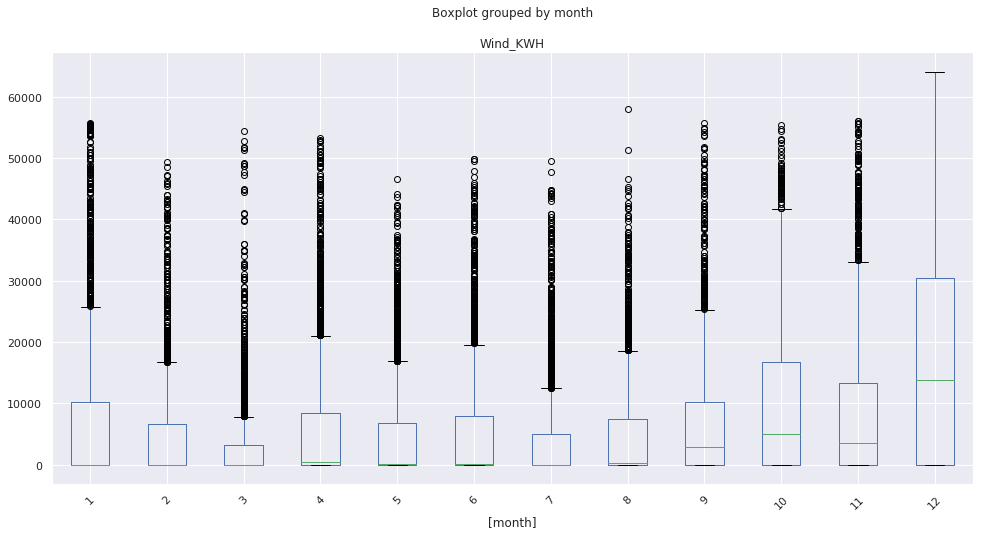

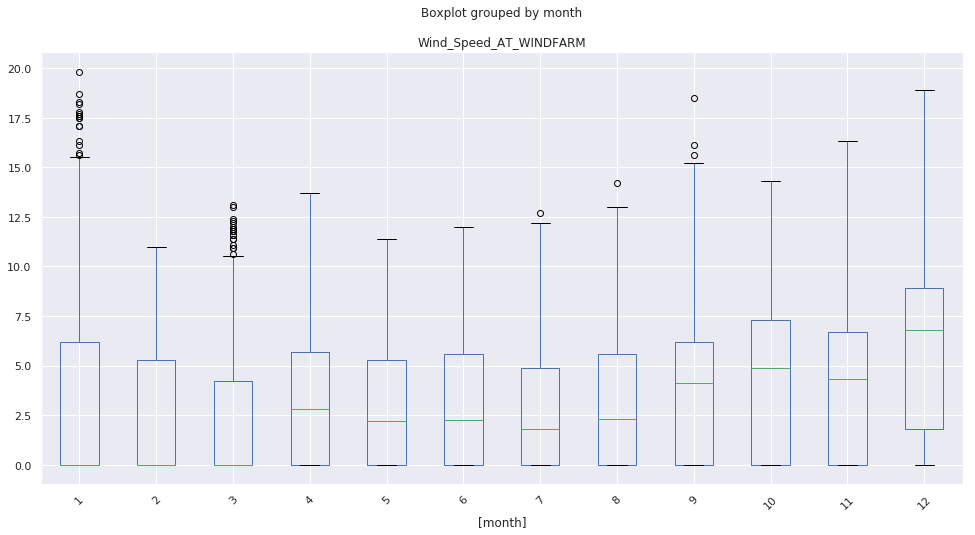

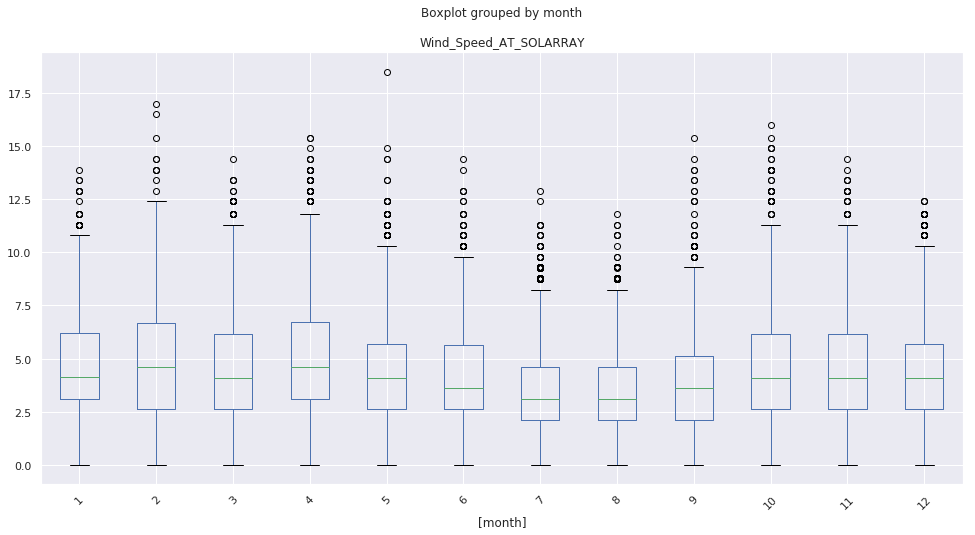

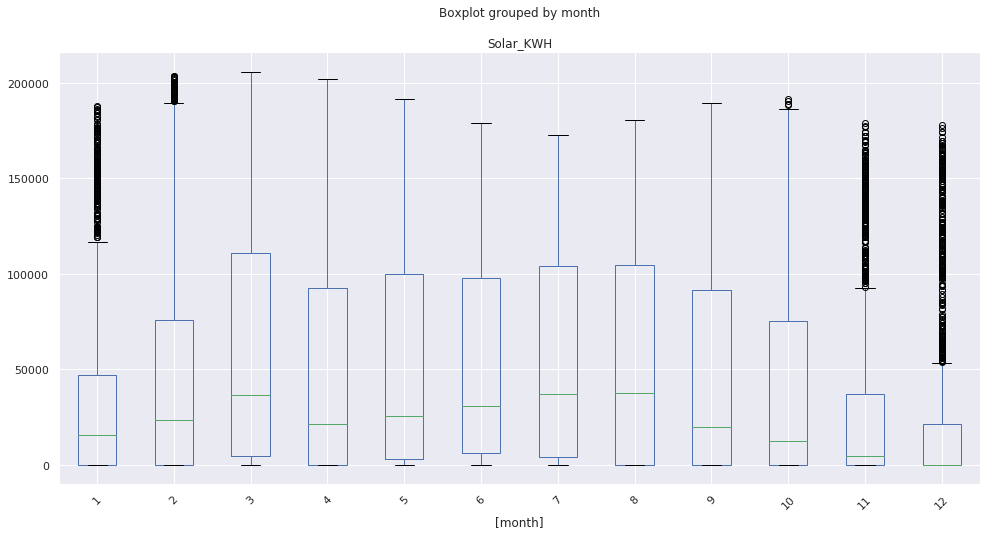

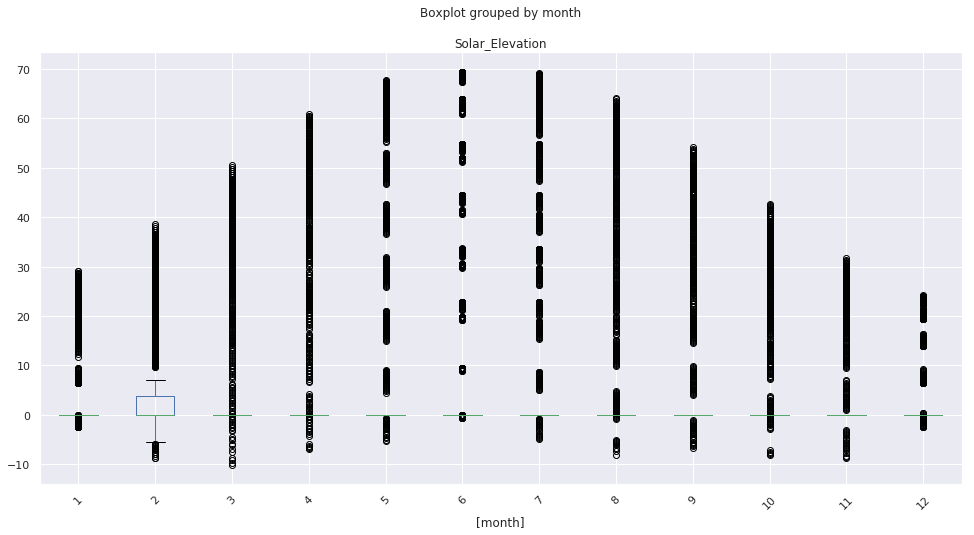

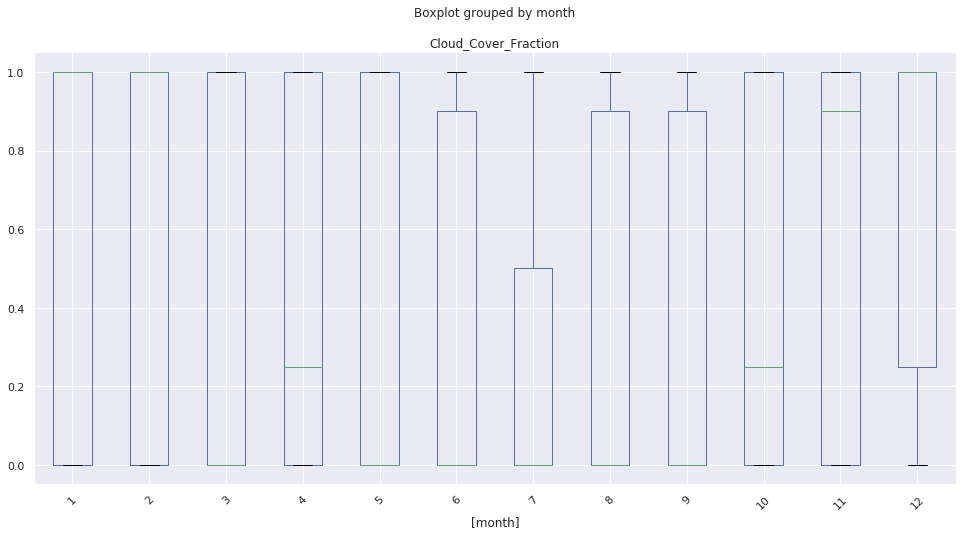

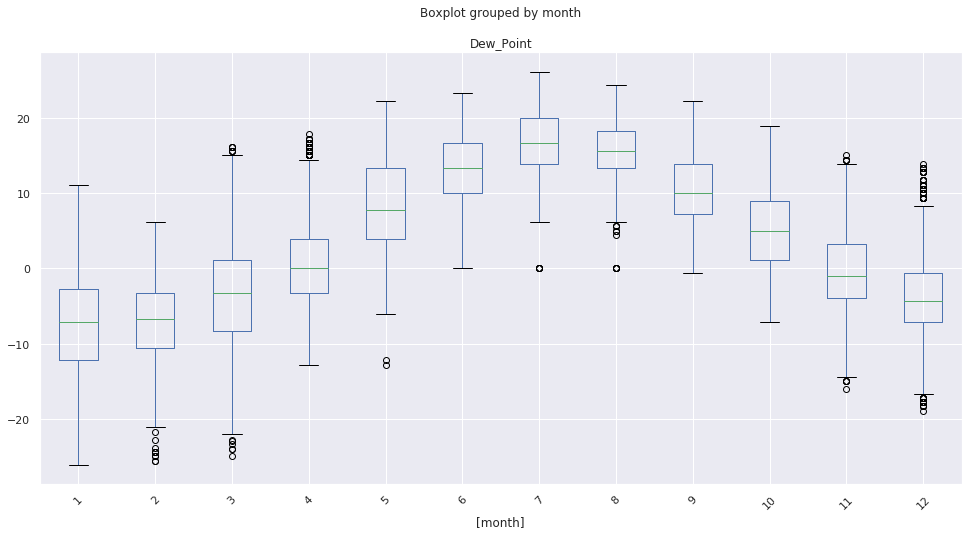

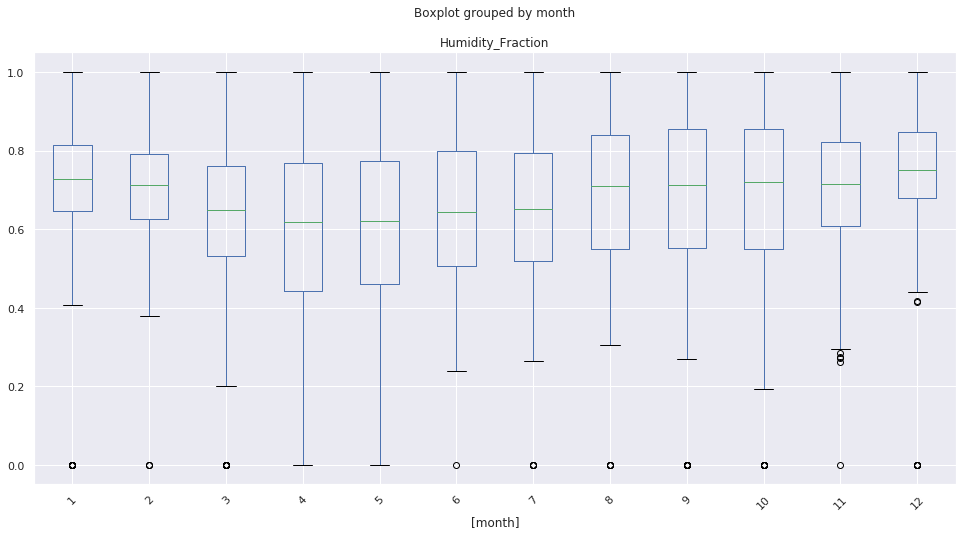

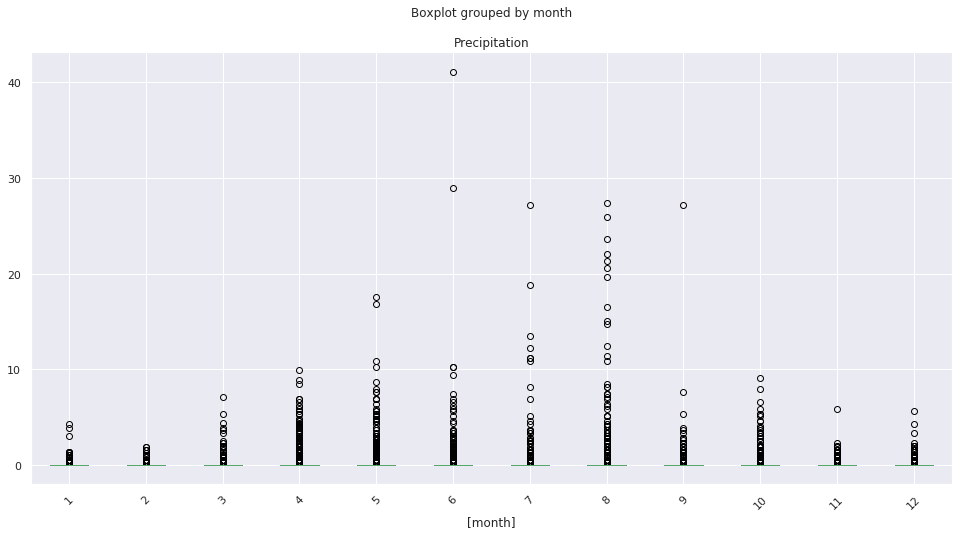

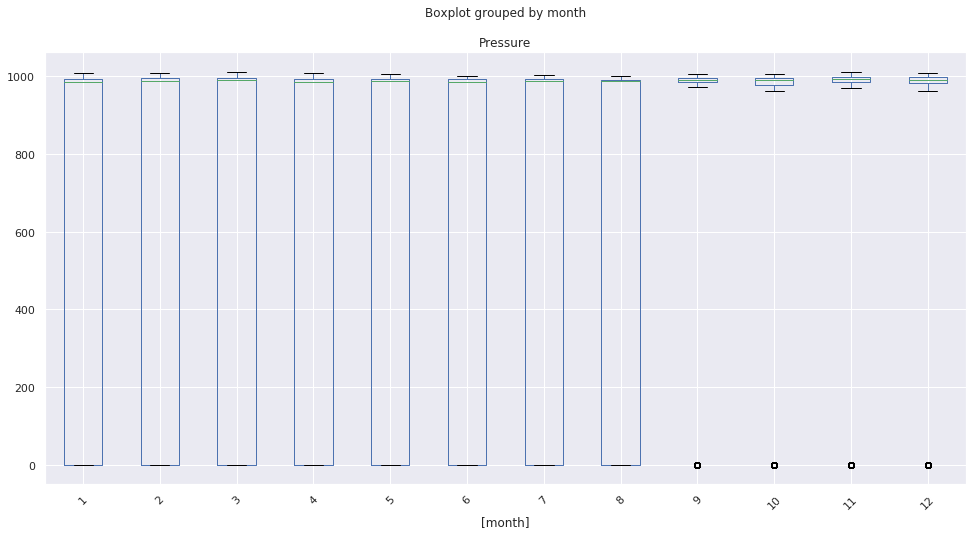

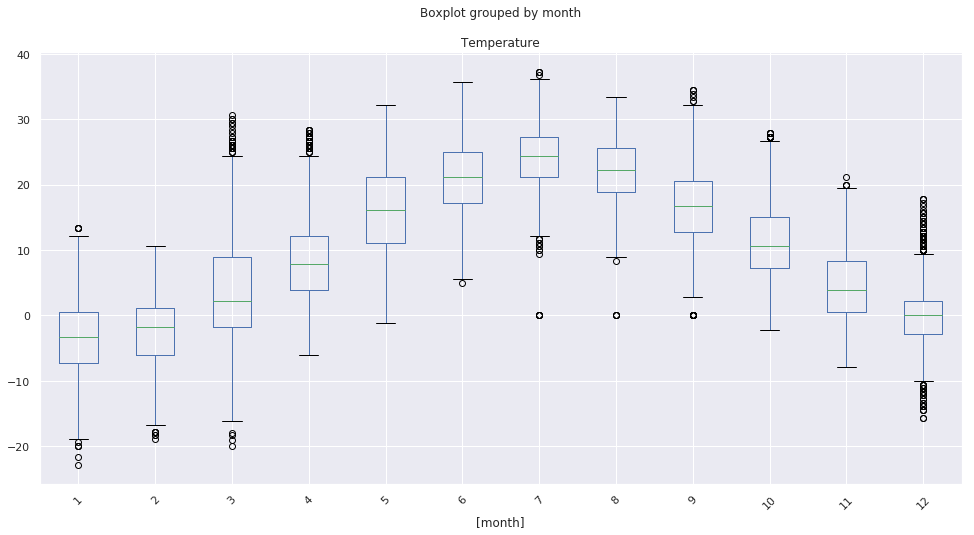

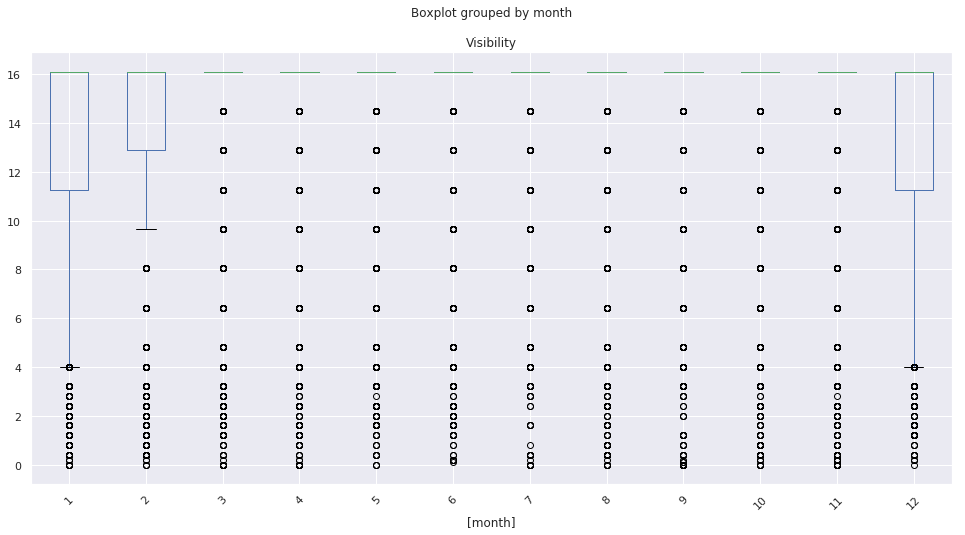

In [4]:
for field in production_fields:
    print("Plotting field '{}'".format(field))
    ds=partition_dataset(production, field)
    ds=pd.DataFrame(ds)
    plot_me(ds, field, 'month')